In [60]:
# Import packages 
import pandas as pd
import numpy as np
import netCDF4
import h5netcdf
import xarray as xr
from os.path import join
import joblib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import shapely
import cartopy
%matplotlib inline

# We add the github package to our system path so we can import python scripts for that repo. 
import sys
sys.path.append('/home/samuel.varga/projects/2to6_hr_severe_wx/')
sys.path.append('/home/samuel.varga/python_packages/ml_workflow/')
sys.path.append('/home/samuel.varga/python_packages/MontePython/')
sys.path.append('/home/monte.flora/python_packages/WoF_post') #WoF post package
sys.path.append('/home/samuel.varga/python_packages/wofs_ml_severe/')
sys.path.append('/home/samuel.varga/python_packages/VargaPy')
from VargaPy.MlUtils import Simple_Random_Subsample
from main.io import load_ml_data

# Load the Data

In [21]:
TIMESCALE='0to3'
FRAMEWORK='POTVIN'
base_path = f'/work/samuel.varga/data/{TIMESCALE}_hr_severe_wx/{FRAMEWORK}'

y=np.ndarray([3,2399344])
for n, hazard in enumerate(['wind','hail','tornado']):
    X,y[n,:],metadata = load_ml_data(base_path=base_path, 
                            mode=Train, 
                            target_col=f'{hazard}_severe__36km',
                           FRAMEWORK='POTVIN',
                           TIMESCALE='0to3',
                           Big=True)
print(np.shape(y))
print("Using new variables- dropping old 90th percentile")
X=X[[col for col in X.columns if '90th' not in col]] #Keeps all columns except the old 90th %ile

(3, 2399344)
Using new variables- dropping old 90th percentile


In [22]:
list(X.columns)

['uh_2to5_instant__time_max__45km__ens_mean',
 'uh_0to2_instant__time_max__45km__ens_mean',
 'wz_0to2_instant__time_max__45km__ens_mean',
 'comp_dz__time_max__45km__ens_mean',
 'ws_80__time_max__45km__ens_mean',
 'hailcast__time_max__45km__ens_mean',
 'w_up__time_max__45km__ens_mean',
 'okubo_weiss__time_max__45km__ens_mean',
 'uh_2to5_instant__time_max__45km__ens_2nd',
 'uh_0to2_instant__time_max__45km__ens_2nd',
 'wz_0to2_instant__time_max__45km__ens_2nd',
 'comp_dz__time_max__45km__ens_2nd',
 'ws_80__time_max__45km__ens_2nd',
 'hailcast__time_max__45km__ens_2nd',
 'w_up__time_max__45km__ens_2nd',
 'okubo_weiss__time_max__45km__ens_2nd',
 'uh_2to5_instant__time_max__45km__ens_IQR',
 'uh_0to2_instant__time_max__45km__ens_IQR',
 'wz_0to2_instant__time_max__45km__ens_IQR',
 'comp_dz__time_max__45km__ens_IQR',
 'ws_80__time_max__45km__ens_IQR',
 'hailcast__time_max__45km__ens_IQR',
 'w_up__time_max__45km__ens_IQR',
 'okubo_weiss__time_max__45km__ens_IQR',
 'uh_2to5_instant__time_max__45k

In [23]:
print(np.shape(X.values))
print(len(y[0]))

(2399344, 176)

## Scatter Plots for 36km Wind

Base rate of y_full: 0.030960129101954535
Base rate of subsample for 1.0%: 0.03192597841036969
Base rate of y_full: 0.030960129101954535
Base rate of subsample for 5.0%: 0.0310001917193895
Base rate of y_full: 0.030960129101954535
Base rate of subsample for 10.0%: 0.030687605758250185
Base rate of y_full: 0.030960129101954535
Base rate of subsample for 15.0%: 0.030747344408601253


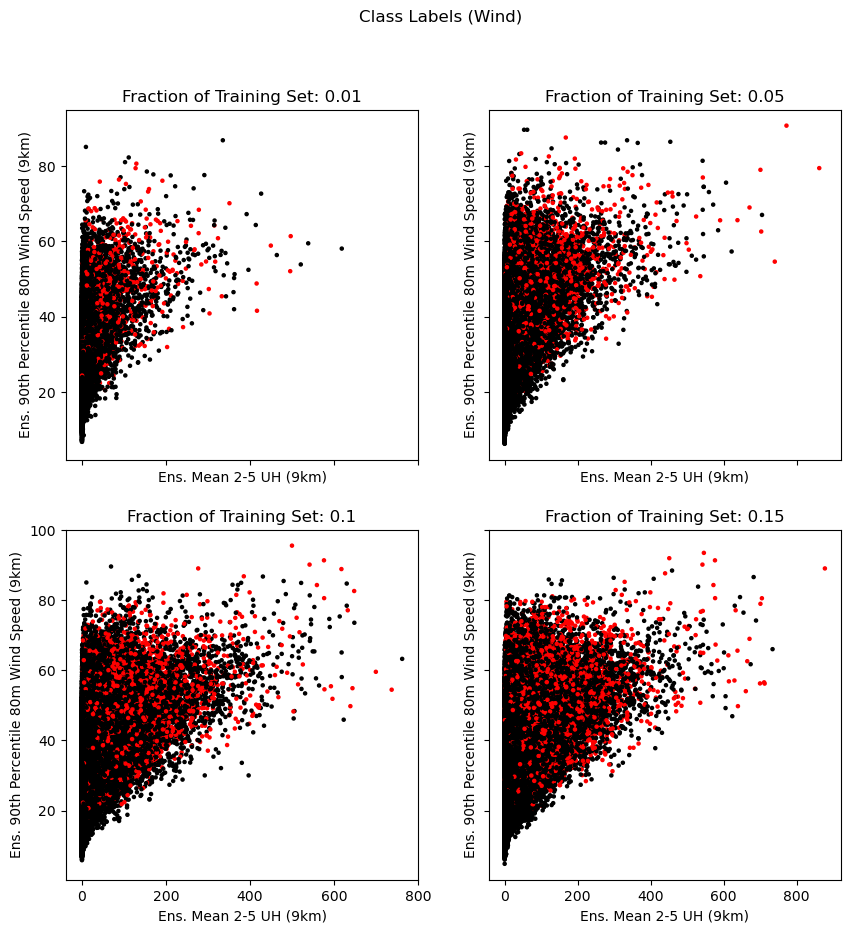

In [79]:
Seed=np.random.RandomState(42)
percents=[0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 1]
fig, axes= plt.subplots(2,2, sharex='col', sharey='row', figsize=(10,10))
fig.suptitle('Class Labels (Wind)')
for p, ax in zip(percents[0:4], axes.flat):
    X_sub, y_sub = Simple_Random_Subsample(X, y[0], p, Seed)
    ax.scatter(X_sub['uh_2to5_instant__time_max__9km__ens_mean'], X_sub['ws_80__time_max__9km__ens_16th'],color=np.where(y_sub==1,'r', 'k'), s=5)
    ax.set_title(f'Fraction of Training Set: {p}')
    ax.set_xlabel('Ens. Mean 2-5 UH (9km)')
    ax.set_ylabel('Ens. 90th Percentile 80m Wind Speed (9km)')
plt.show()

Base rate of y_full: 0.030960129101954535
Base rate of subsample for 20.0%: 0.031206498453741446
Base rate of y_full: 0.030960129101954535
Base rate of subsample for 25.0%: 0.030731733340446387
Base rate of y_full: 0.030960129101954535
Base rate of subsample for 50.0%: 0.03131522616181756
Base rate of y_full: 0.030960129101954535


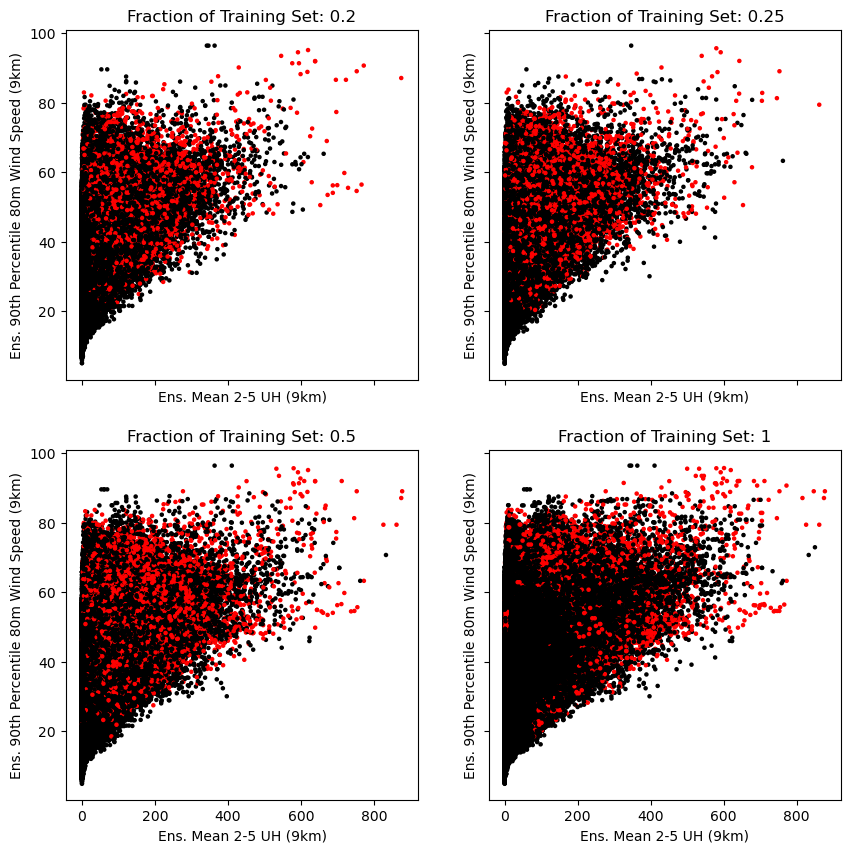

In [81]:
fig, axes= plt.subplots(2,2, sharex='col', sharey='row', figsize=(10,10))
for p, ax in zip(percents[4:], axes.flat):
    X_sub, y_sub = Simple_Random_Subsample(X, y[0], p, Seed)
    ax.scatter(X_sub['uh_2to5_instant__time_max__9km__ens_mean'], X_sub['ws_80__time_max__9km__ens_16th'],color=np.where(y_sub==1,'r', 'k'), s=5)
    ax.set_title(f'Fraction of Training Set: {p}')
    ax.set_xlabel('Ens. Mean 2-5 UH (9km)')
    ax.set_ylabel('Ens. 90th Percentile 80m Wind Speed (9km)')
plt.show()

## Scatter Plots for 36km Hail

Base rate of y_full: 0.030960129101954535
Base rate of subsample for 1.0%: 0.03192597841036969
Base rate of y_full: 0.030960129101954535
Base rate of subsample for 5.0%: 0.0310001917193895
Base rate of y_full: 0.030960129101954535
Base rate of subsample for 10.0%: 0.030687605758250185
Base rate of y_full: 0.030960129101954535
Base rate of subsample for 15.0%: 0.030747344408601253


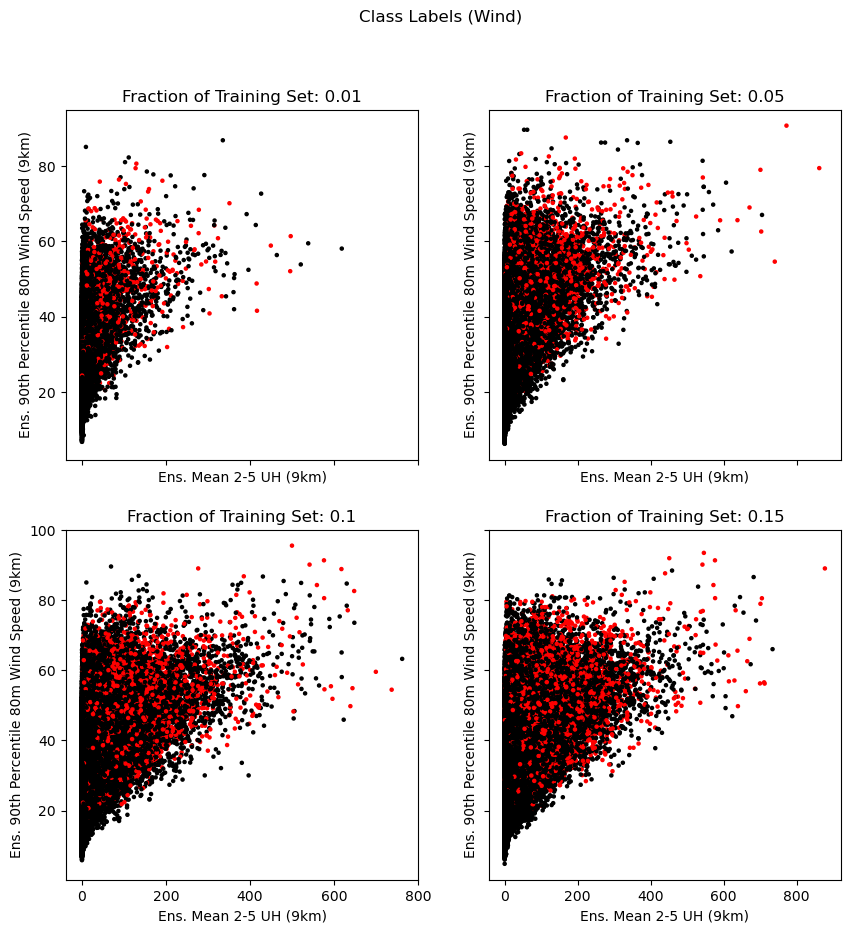

In [82]:
Seed=np.random.RandomState(42)
percents=[0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 1]
fig, axes= plt.subplots(2,2, sharex='col', sharey='row', figsize=(10,10))
fig.suptitle('Class Labels (Hail)')
for p, ax in zip(percents[0:4], axes.flat):
    X_sub, y_sub = Simple_Random_Subsample(X, y[1], p, Seed)
    ax.scatter(X_sub['uh_2to5_instant__time_max__9km__ens_mean'], X_sub['ws_80__time_max__9km__ens_16th'],color=np.where(y_sub==1,'r', 'k'), s=5)
    ax.set_title(f'Fraction of Training Set: {p}')
    ax.set_xlabel('Ens. Mean 2-5 UH (9km)')
    ax.set_ylabel('Ens. 90th Percentile 80m Wind Speed (9km)')
plt.show()

Base rate of y_full: 0.028853720016804592
Base rate of subsample for 20.0%: 0.028712062483849724
Base rate of y_full: 0.028853720016804592
Base rate of subsample for 25.0%: 0.028754526237171493
Base rate of y_full: 0.028853720016804592
Base rate of subsample for 50.0%: 0.028732020085490036
Base rate of y_full: 0.028853720016804592


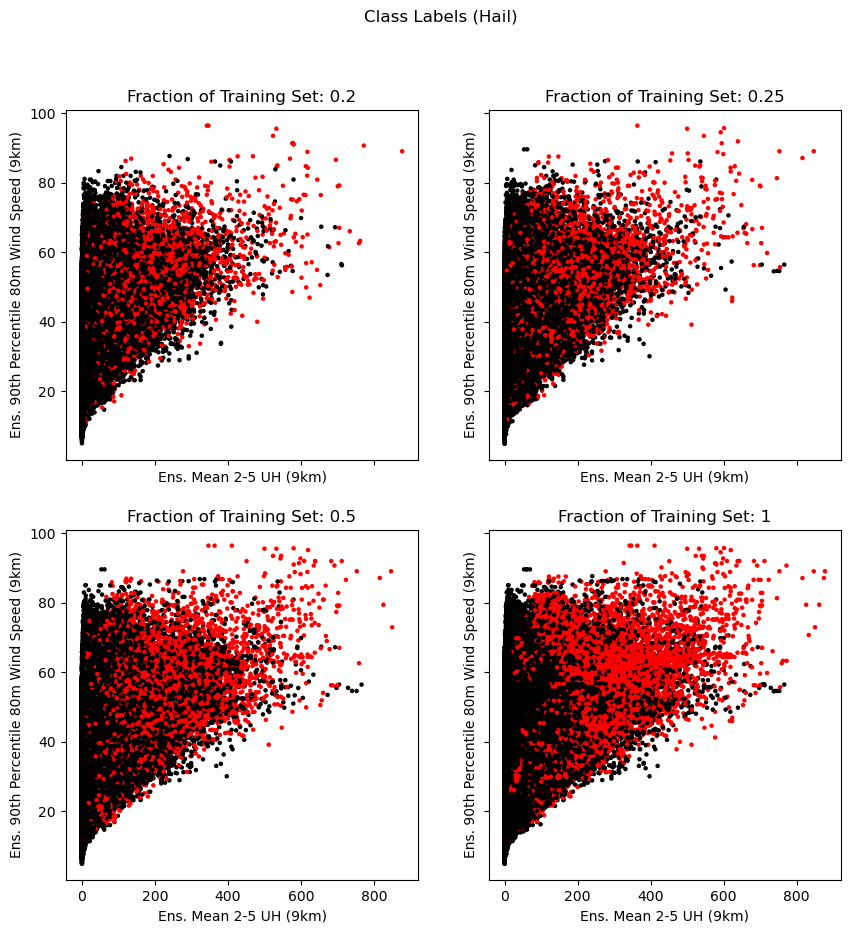

In [83]:
fig, axes= plt.subplots(2,2, sharex='col', sharey='row', figsize=(10,10))
fig.suptitle('Class Labels (Hail)')
for p, ax in zip(percents[4:], axes.flat):
    X_sub, y_sub = Simple_Random_Subsample(X, y[1], p, Seed)
    ax.scatter(X_sub['uh_2to5_instant__time_max__9km__ens_mean'], X_sub['ws_80__time_max__9km__ens_16th'],color=np.where(y_sub==1,'r', 'k'), s=5)
    ax.set_title(f'Fraction of Training Set: {p}')
    ax.set_xlabel('Ens. Mean 2-5 UH (9km)')
    ax.set_ylabel('Ens. 90th Percentile 80m Wind Speed (9km)')
plt.show()

## Scatter Plots for 36km Tornado

Base rate of y_full: 0.007886322261418121
Base rate of subsample for 1.0%: 0.008669195181928062
Base rate of y_full: 0.007886322261418121
Base rate of subsample for 5.0%: 0.008410646261055123
Base rate of y_full: 0.007886322261418121
Base rate of subsample for 10.0%: 0.007756299649070161
Base rate of y_full: 0.007886322261418121
Base rate of subsample for 15.0%: 0.007674332663704741


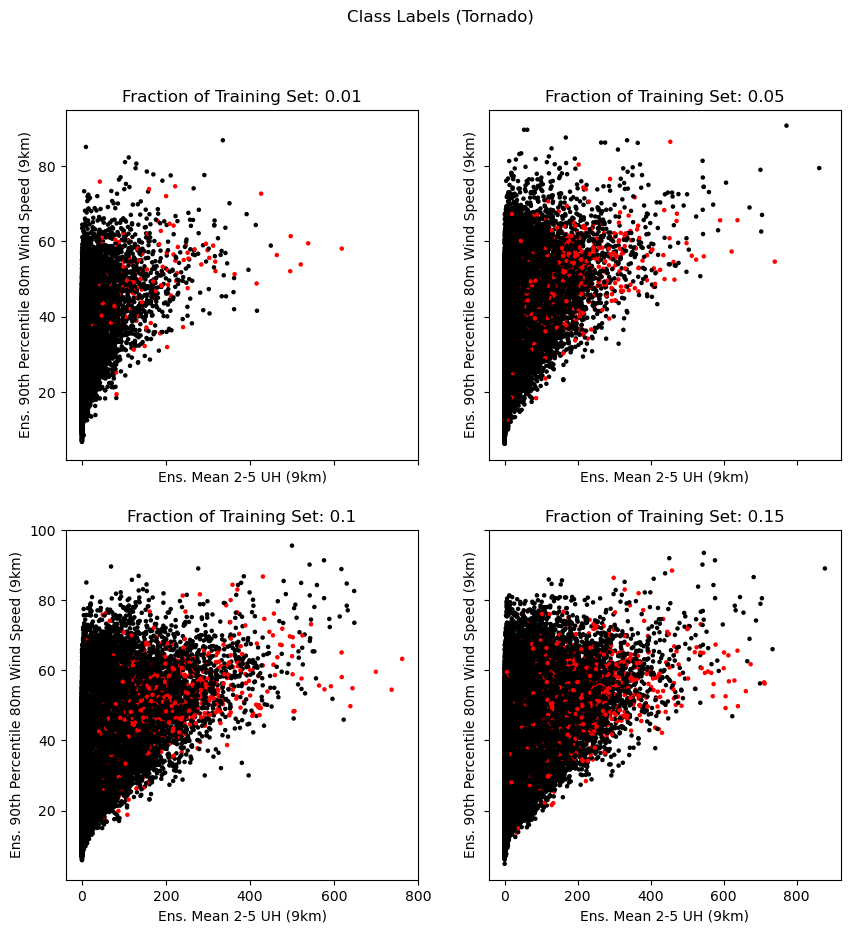

In [84]:
Seed=np.random.RandomState(42)
percents=[0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 1]
fig, axes= plt.subplots(2,2, sharex='col', sharey='row', figsize=(10,10))
fig.suptitle('Class Labels (Tornado)')
for p, ax in zip(percents[0:4], axes.flat):
    X_sub, y_sub = Simple_Random_Subsample(X, y[2], p, Seed)
    ax.scatter(X_sub['uh_2to5_instant__time_max__9km__ens_mean'], X_sub['ws_80__time_max__9km__ens_16th'],color=np.where(y_sub==1,'r', 'k'), s=5)
    ax.set_title(f'Fraction of Training Set: {p}')
    ax.set_xlabel('Ens. Mean 2-5 UH (9km)')
    ax.set_ylabel('Ens. 90th Percentile 80m Wind Speed (9km)')
plt.show()

Base rate of y_full: 0.007886322261418121
Base rate of subsample for 20.0%: 0.007877166220710696
Base rate of y_full: 0.007886322261418121
Base rate of subsample for 25.0%: 0.007798798338212445
Base rate of y_full: 0.007886322261418121
Base rate of subsample for 50.0%: 0.00790882841309958
Base rate of y_full: 0.007886322261418121


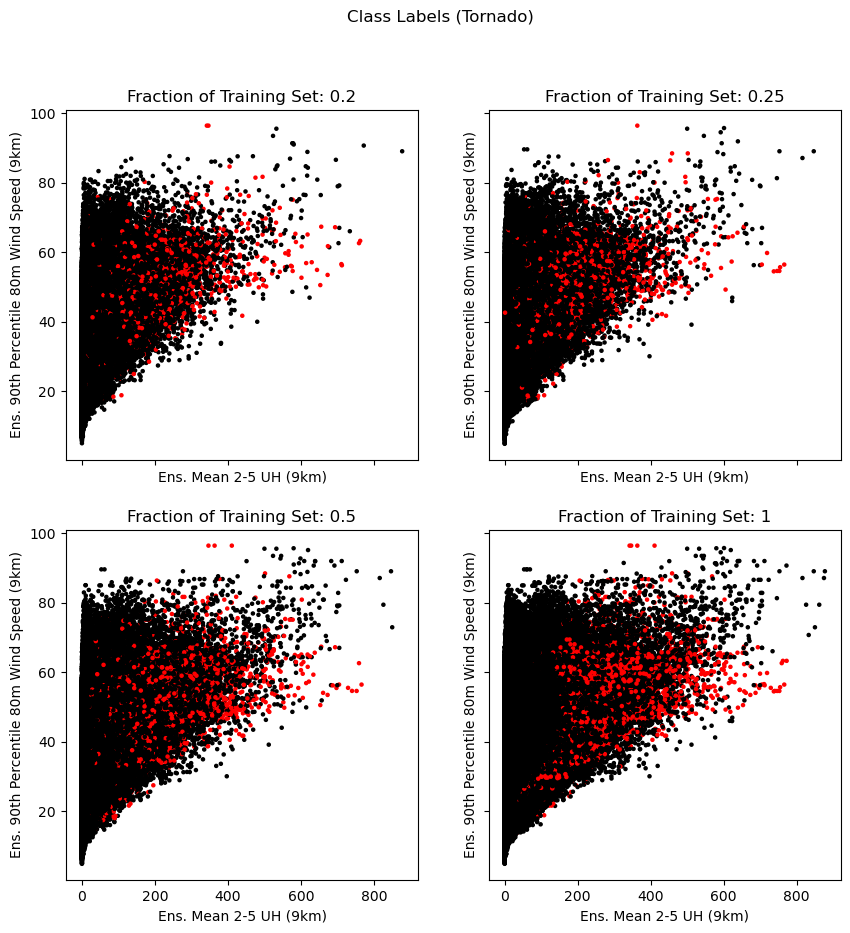

In [85]:
fig, axes= plt.subplots(2,2, sharex='col', sharey='row', figsize=(10,10))
fig.suptitle('Class Labels (Tornado)')
for p, ax in zip(percents[4:], axes.flat):
    X_sub, y_sub = Simple_Random_Subsample(X, y[2], p, Seed)
    ax.scatter(X_sub['uh_2to5_instant__time_max__9km__ens_mean'], X_sub['ws_80__time_max__9km__ens_16th'],color=np.where(y_sub==1,'r', 'k'), s=5)
    ax.set_title(f'Fraction of Training Set: {p}')
    ax.set_xlabel('Ens. Mean 2-5 UH (9km)')
    ax.set_ylabel('Ens. 90th Percentile 80m Wind Speed (9km)')
plt.show()